<a href="https://colab.research.google.com/github/thanujaupperi029/Human-Activity-Recognition-Using-LSTM/blob/main/Minor_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
train_df=pd.read_csv('/content/train.csv')
test_df=pd.read_csv('/content/test.csv')

In [ ]:
print('train dataset size:',test_df.shape)
train_df.head()

train dataset size: (1438, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,STANDING


In [ ]:
print('null values:',train_df.isnull().values.sum())
train_df.dtypes

null values: 388


tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                 float64
Activity                 object
Length: 563, dtype: object

In [ ]:
print('Number of duplicates in train set:{}'.format(sum(train_df.duplicated())))
print('Number of duplicates in test set:{}'.format(sum(test_df.duplicated())))

Number of duplicates in train set:0
Number of duplicates in test set:0


In [ ]:
train_df['subject'].groupby(train_df['subject']).count()

subject
1.0    318
Name: subject, dtype: int64

In [ ]:
train_df['subject'].groupby(train_df['Activity']).value_counts()

Activity            subject
LAYING              1.0        50
SITTING             1.0        47
STANDING            1.0        53
WALKING             1.0        95
WALKING_DOWNSTAIRS  1.0        32
WALKING_UPSTAIRS    1.0        41
Name: count, dtype: int64

In [ ]:
train_df['Activity'].groupby(train_df['Activity']).size()

Activity
LAYING                50
SITTING               47
STANDING              53
WALKING               95
WALKING_DOWNSTAIRS    32
WALKING_UPSTAIRS      41
Name: Activity, dtype: int64

In [ ]:
px.pie(train_df,names='Activity',title='Activity in database')

In [ ]:
px.histogram(data_frame=train_df,x='subject',color='Activity',barmode='group',title='Histogram of data in train set')

In [ ]:
px.histogram(data_frame=test_df,x='subject',color='Activity',barmode='group',title='Histogram of data in test set')

In [ ]:
px.histogram(train_df,x='Activity',color='Activity',title='Number of recordings per activity')

In [ ]:
px.histogram(train_df,x='tBodyAccMag-mean()',color='Activity')

In [ ]:
px.box(train_df, x='Activity',y='tBodyAccMag-mean()')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

X_train=train_df.drop('Activity',axis=1)
Y_train=train_df['Activity']
X_test=test_df.drop('Activity',axis=1)
Y_test=test_df['Activity']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)


Epoch 1/50
10/10 [==============================] - 5s 113ms/step - loss: nan - accuracy: 0.5517 - val_loss: nan - val_accuracy: 0.1773
Epoch 2/50
10/10 [==============================] - 0s 27ms/step - loss: nan - accuracy: 0.1567 - val_loss: nan - val_accuracy: 0.1773
Epoch 3/50
10/10 [==============================] - 0s 27ms/step - loss: nan - accuracy: 0.1567 - val_loss: nan - val_accuracy: 0.1773
Epoch 4/50
10/10 [==============================] - 0s 27ms/step - loss: nan - accuracy: 0.1567 - val_loss: nan - val_accuracy: 0.1773
Epoch 5/50
10/10 [==============================] - 0s 28ms/step - loss: nan - accuracy: 0.1567 - val_loss: nan - val_accuracy: 0.1773


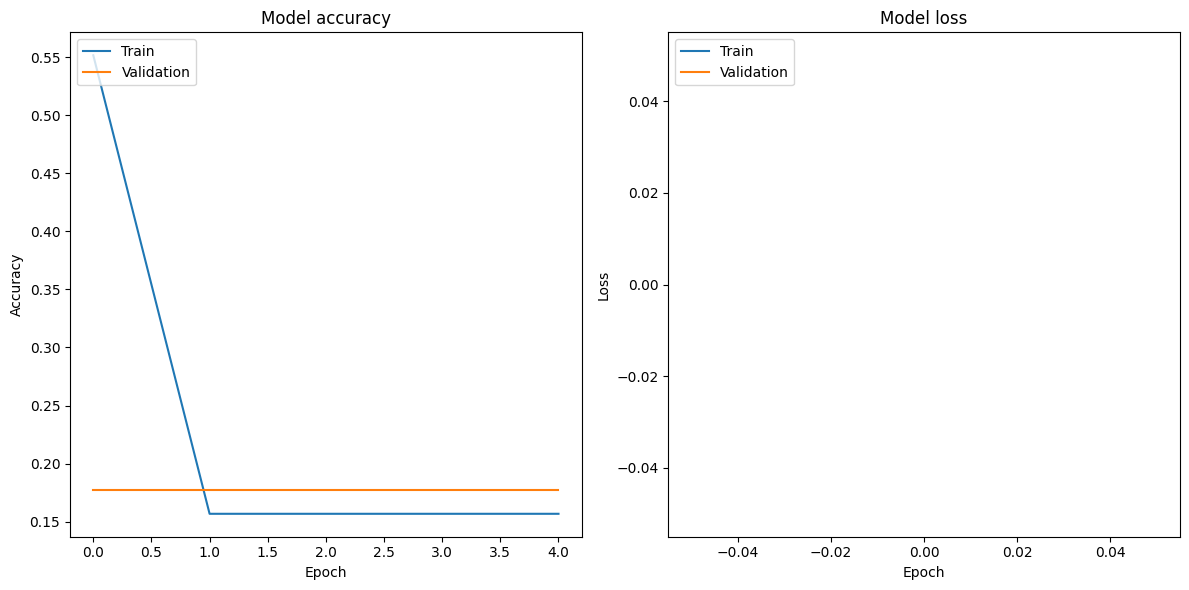

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

def build_lstm_model(input_shape, output_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_shape, activation='softmax'))
    return modelD

def train_lstm_model(X_train, Y_train, X_val, Y_val, batch_size=32, epochs=50):
    model = build_lstm_model((X_train.shape[1], X_train.shape[2]), len(np.unique(Y_train)))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, Y_val), callbacks=[early_stopping], verbose=1)
    return model, history

X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Train LSTM model
lstm_model, lstm_history = train_lstm_model(X_train_reshaped, Y_train_encoded,
                                            X_test_reshaped, Y_test_encoded)

# Plot training and validation curves
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


45/45 [==============================] - 1s 3ms/step
Testing Accuracy: 0.17732962447844228


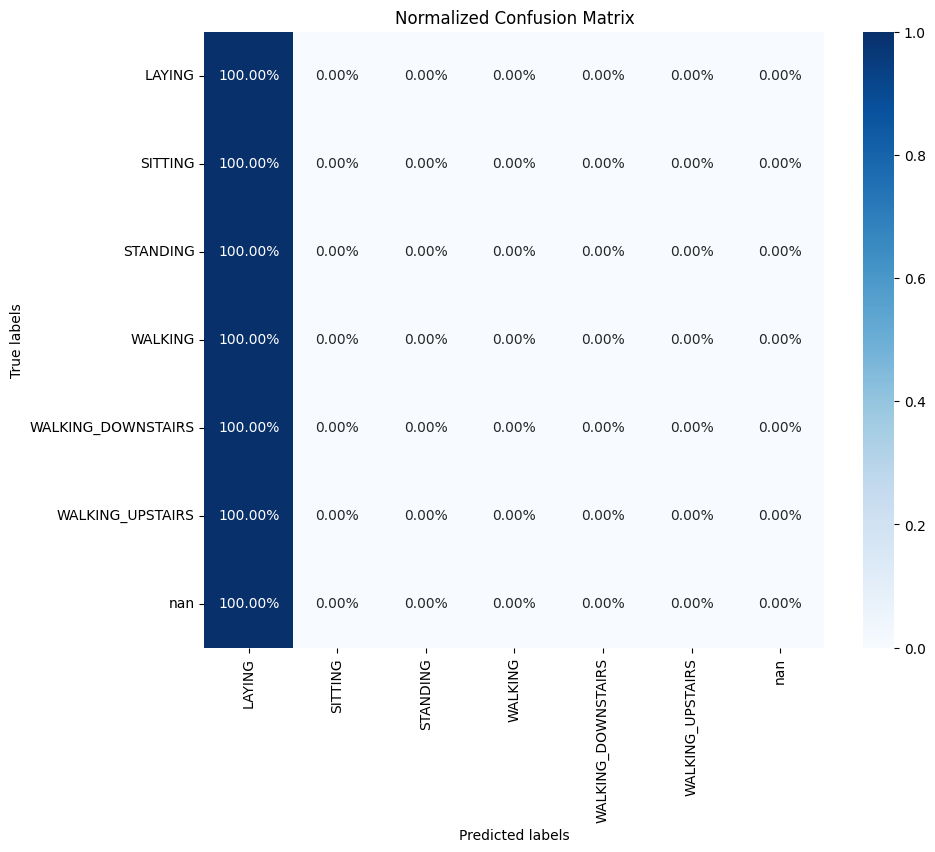

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, Y_test):
    Y_pred_prob = model.predict(X_test)
    Y_pred = np.argmax(Y_pred_prob, axis=1)
    testing_accuracy = accuracy_score(Y_test, Y_pred)
    print("Testing Accuracy:", testing_accuracy)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    #print("Confusion Matrix:")
    #print(conf_matrix)

    # Normalize confusion matrix
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    # Display confusion matrix as heatmap with percentages
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Normalized Confusion Matrix')
    plt.show()

    return testing_accuracy, conf_matrix

# Evaluate LSTM model
testing_accuracy, conf_matrix = evaluate_model(lstm_model, X_test_reshaped, Y_test_encoded)